<a href="https://colab.research.google.com/github/pragneshrana/LearnDataScience/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: 

1.   https://arxiv.org/pdf/1812.08434.pdf
2.   https://arxiv.org/abs/2011.02260


Graph neural networks (GNNs) are connectionist models that capture the dependence of graphs via message passing between the nodes of graphs. Graph neural networks (GNNs) are connectionist models that capture the dependence of graphs via message passing between the nodes of graphs.

Application:

* Image classification by word embedding using ZSL

  Zero shot learning (ZSL) refers to trying to learn to recognise classes that the model has not encountered in its training.
* Text : text classification, sequence labelling, machine translation, relation and event extraction
* Combinatorial Optimization: minimum vertex cover problem, maximum cut, the travelling salesman problem, minimum spanning tree, etc.
*   Recommender Systems
*   Social influence prediction
* Medica/Pharmacy 
*   https://arxiv.org/pdf/1812.08434.pdf


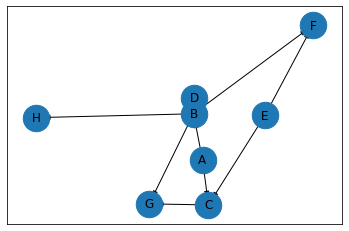

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

#### The adjacency matrix from the above graph can be written as,
$
\begin{matrix}
&A&B & C & D & E & F & G & H\\
\end{matrix} \\
\begin{matrix}
A\\
B\\
C\\
D\\
E\\
F\\
G\\
H\\ 
\end{matrix}
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 0 & 1 & 1 & 1\\
1 & 0 & 0 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
\end{bmatrix}
$

The other two type matrix tcan be:
- Incident Matrix (nodes X edges)
- Degree matrix (nodes X nodes) [number of edges attached to each node--2 for self connection]

- Laplacian matrix (graph laplacian)
  -  $L = D - A$ 
  - Laplace-Beltrami opeartor
  - measure of smothness of a vetrex or How quickly it chnages between the adjacent vertex.

### Example of application


*   Node level prediction -- Data about unlabelled nodel. (Will he/she smoke?) [predicting the identity or role of each node within a graph.] 
*   Edge level (link) prediction -- What will be next netflix video? [ given nodes that represent the objects in the image, we wish to predict which of these nodes share an edge or what the value of that edge is. ]
*  Graph level prediction --- Is this module suitable for this customer [goal is to predict the property of an entire graph]



## Problems with graph

Goal is to feed graph in neural network.  --> Geometric deep learning

neutral-network-diagram.svg

- Input to the neural-net is fixed but graphs size can arbitarily grow.

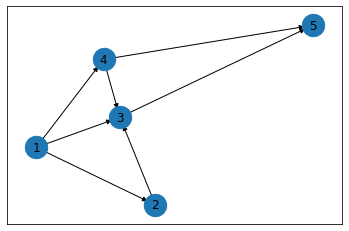

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('1', '2'), ('1', '4'), ('1', '3'), ('4', '3'), ('2', '3'), ('3', '5'), ('4', '5')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

 - if 
  -  not innvariant to node ordering 
  - graphs of same size 

  $
\begin{matrix}
&1&2 & 3 & 4 & 5 & feat...\\
\end{matrix} \\
\begin{matrix}
1\\
2\\
3\\
4\\
5
\end{matrix}
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 1 & 1 & 1 & 1\\
1 & 0 & 0 & 1 & 0 & 0 & 1 & 0\\
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$

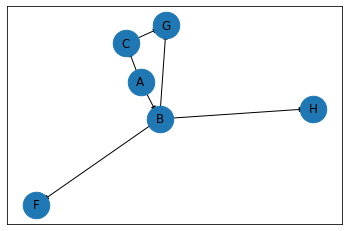

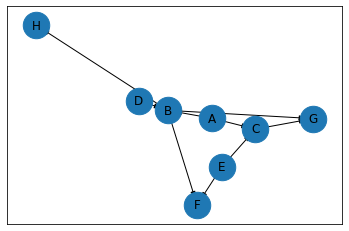

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

## Iso-morphism
- The rotation of graph will change the orientation and order of rows in input matrix. 
We can't directly feed matrix to the neural-net


Also, Adjacency matix include node information but nothing about edges, how far or close they are!

Representation Learning -- Represent graph data such that each node know about all other connected nodes.

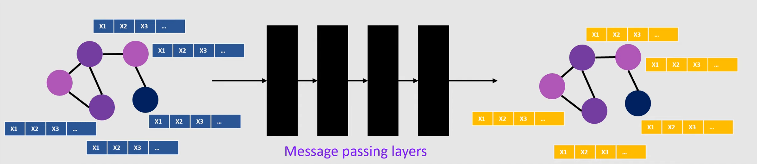

3 Main Types of Graph Neural Networks (GNN)

    Recurrent graph neural network.
    Spatial convolutional network.
    Spectral convolutional network.

The task of all GNN is to determine the node embedding for each node by looking at the information on its neighboring nodes.

## Spatial Convoltion network

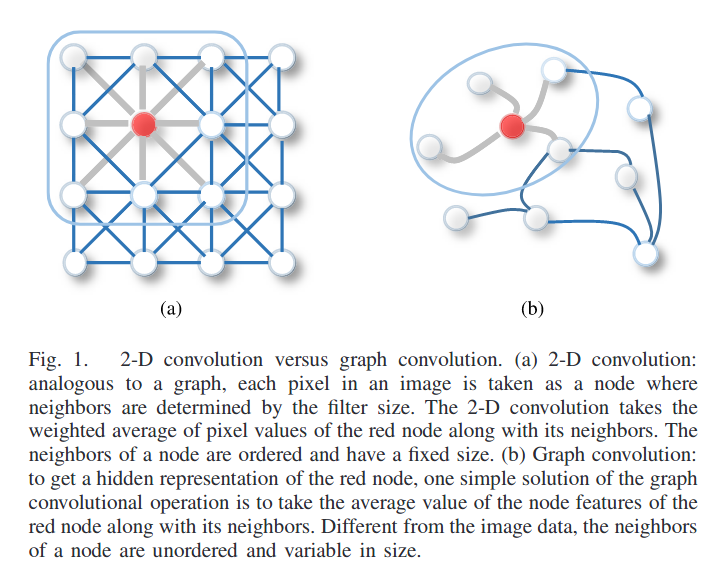

Ref: Wu, Z., Pan, S., Chen, F., Long, G., Zhang, C. and Philip, S.Y., 2020. A comprehensive survey on graph neural networks. IEEE transactions on neural networks and learning systems, 32(1), pp.4-24.

Useful problem that can be formulated from graph:


# Graph Convolution (Spectral convolution)
A : Adjacency matrix \\
$\hat{A}$ : A + I (added I to include self loops) \\
$\hat{D}$ : $\hat{A}^{-1}$ (normalizing) \\
X : feature vector \\
W : weight vector (feature reduction) \\

Input to the hidden layer applying relu : \\
= relu($\hat{A}^{-1}\cdot \hat{A} \cdot  X \cdot W$)


### Nodel level prediction

In [ ]:
from networkx import karate_club_graph, to_numpy_matrix
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [ ]:
zkc.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

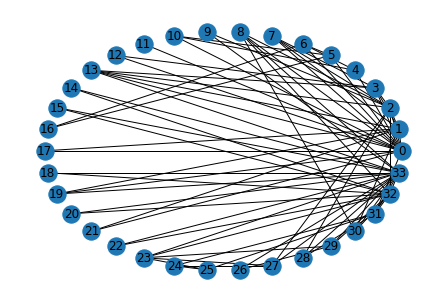

In [ ]:
nx.draw_circular(zkc, with_labels=True)
plt.show()

In [ ]:
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

In [ ]:
def relu(x):
    return np.maximum(0, x)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

In [ ]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

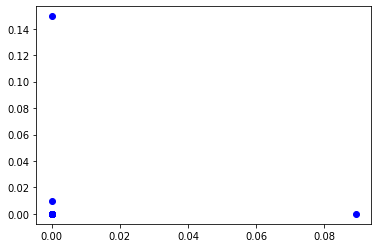

In [ ]:
for i in range(len(feature_representations)):
  plt.scatter(feature_representations[i][0],feature_representations[i][1],color='b')
plt.show()

Apart from storing adjacency matrix the more efficient way is to store nodes, edges and adjacency list seperately.

Edge and adjacency list have direct mapping.



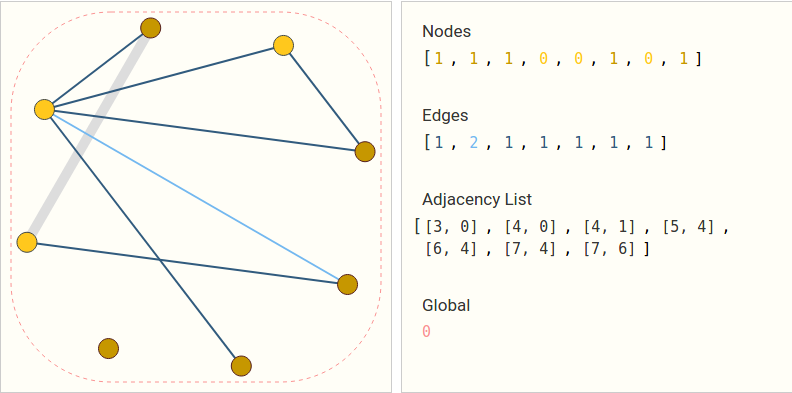

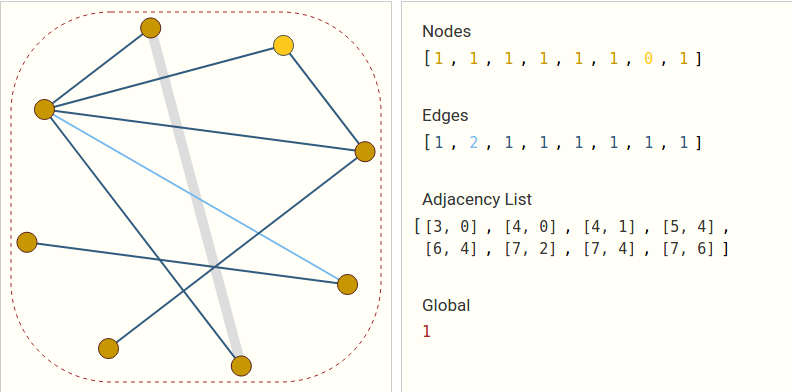

## Recurrent Graph Neural Network
RecGNN is built with Banach fixed-point theorem. It uses contraction mapping. If we apply mapping T on x K times then $x^k$ ~ $x^{k-1}$

The parameterized function of RecGNN is defines as, \\
$x_n = \mathcal{f}_w (l_n,l_{co[n]},x_{ne[n]},l_{ne[n]})$

# How to represent graph in efficient matrix format?
- Node Embedding  : Map nodes (of P dimension) to d dimension embedings such that similar nodes in the graph are embedded
- d<<P
- neighbourhood closness remain consistent


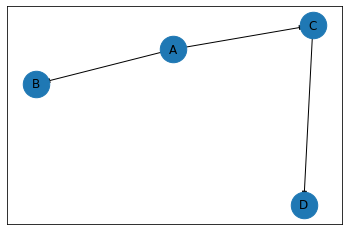

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'),  ('C', 'D')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

For, node-a feature vectoer is $x^a$ and for node-b feature vector is $x^b$. \\
so, GOAL: similarity(a,b) = ${z^{a}}^T z^b$ ~ ${x^{a}}^T x^b$ \\
where, Encoder function: $\mathcal{f}({x:z})$

To peform this task, 
The given can be performed using two step computational graph.

Figure(1)

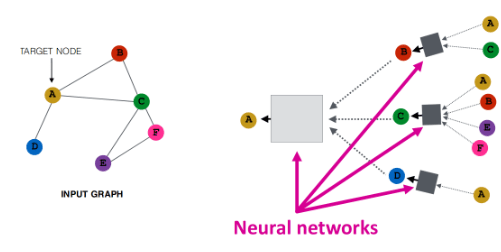

### Above process for each computational node:

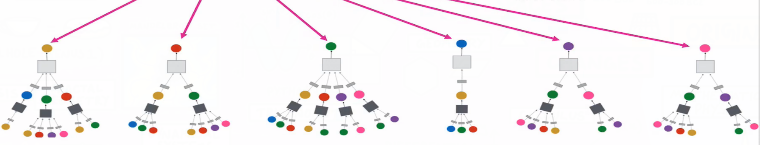

In figure(1), let' say input $x^A$ is $MX1$ and similar for all other inut. \\
The output of the computaional graph is $Z_A$ which is $NX1$ where, $N<<M$.

Also, the base layer of graph is assigned as $K=0$ and layer as we go up layer increase. \\
Figure(1) has two layers k=0 (base layer) and k=1. \\
where, k=$1,2,...K-1$ indiates position in computaitonal graph.

Formulas: \\
$h_v^{0} = x_v$ (activation at the zeroth layer is feature vector itself)  

$h_v^{k} = \sigma \bigg(\underbrace{w_k \sum_{u \in N(v)} \bigg[ \frac{h_u^{k-1}}{N(v)}  \bigg]}_\text{Averaging of the neighbour}  + \underbrace{B_k h_v^{k-1}}_\text{self loop activation bias}  \bigg)$ \\
(Above is non-linear recursive eqn ) where, $N(v)$ is total number of layers \\

$Z^A = Z^M = h_v^K$

## Matrix Notation

- Graph $G(V,E)$
- Input feature matrix $(NXM) = X$ \\
    where, N is number of node, M is feature vector
- Adjacency Matrix $(NXN) = A$
- Generalized neural network is represented as, \\
    $H^{l+1} = f(H^l,A)$ with $H^0 = X$  and $H^L = Z$ \\
    where,  L = number of layers


Simple layer wise propogation rule is,

$H^{l+1} = {\sigma} ( A_{NXN} H^l_{NXM} W^l_{MXP})$

where, $p<<N$ dimensional reduction (needed for node embedding)

to, add the selfloop we should use $\hat{A} = A+I$ \\
and for symmetric normalization we should use $D^{-1/2} A D^{-1/2}$

so, 

$H^{l+1} = {\sigma} ( D^{-1/2} \hat{A} D^{-1/2} H^l W^l)$

where, D is degree matrix of $\hat{A}$


## Recommendation Systems

In graph-based recommendation systems, users and items are regarded as the nodes within the network.

These include:

    Users to user’s relationship
    Items to items relationship
    Users to items relationship

This can be regarded as a link prediction problem. To find and predict the missing links between users and product items.

### library 
- Pytorch Geometric
- Graph Nets
- Deep graph library

## Basics of pytorch 

In [ ]:
import torch
import torch.nn as nn #modules for neural-nets
import torch.nn.functional as F #lot of function s available
import torchvision 
import torchvision.transforms as transforms
import sklearn.metrics as metrics

#### Downloading and loading in a dataset (here the MNIST handwritten digits dataset)

In [ ]:
BATCH_SIZE = 32

## transformations
transform = transforms.Compose([transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Visulization of the data 

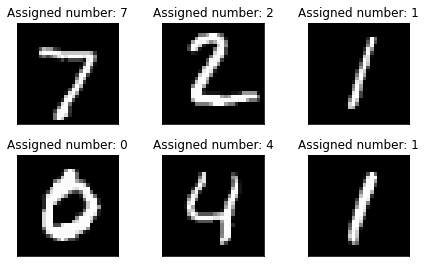

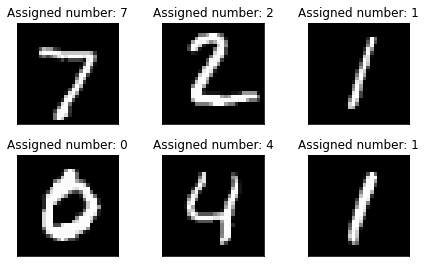

In [ ]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Assigned number: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
# sample data 
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.ones((2,2))

ta = torch.tensor(a, dtype=float) #.to('cuda:0')
tb = torch.ones(2,2, dtype=float) #.to('cuda:0')

print(ta)
print(ta @ tb)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
tensor([[3., 3.],
        [7., 7.]], dtype=torch.float64)


In [ ]:
class NNModel(nn.Module):
    def __init__(self):
        #put trainanle parameterss
        super(NNModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3) #in_channel 1 as grey #applies 2d cconvolution with 32 kernel of size 3
        self.d1 = nn.Linear(26 * 26 * 32, 128) #conv2d to layer of 128 hidden neurons
        self.d2 = nn.Linear(128, 10) # 128 to 10 neurons 

    def forward(self, x):
        #design the trainable graph
        # 32x1x28x28 => 32x32x26x26 -- batchsize X image size 
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)
        #x = x.view(32, -1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

In [ ]:
# defining hyperparameters
learning_rate = 0.001
num_epochs = 5

# calling model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #if cuda support available 
model = NNModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device) 
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad() #for every iteration making gradient zero
        loss.backward() #backprop computes all the gradient 

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += (torch.argmax(logits, 1).flatten() == labels).type(torch.float).mean().item()
    
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))

Epoch: 0 | Loss: 1.5923 | Train Accuracy: 0.87
Epoch: 1 | Loss: 1.4939 | Train Accuracy: 0.97
Epoch: 2 | Loss: 1.4827 | Train Accuracy: 0.98
Epoch: 3 | Loss: 1.4777 | Train Accuracy: 0.99
Epoch: 4 | Loss: 1.4744 | Train Accuracy: 0.99


In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += (torch.argmax(outputs, 1).flatten() == labels).type(torch.float).mean().item()
    preds = torch.argmax(outputs, 1).flatten()#.cpu().numpy()
    # print(preds)
    # print(labels)
    # break
        
print('Test Accuracy: %.2f'%(test_acc/i))

Test Accuracy: 0.98


In [ ]:
# installing PyTorch Geometric and TensorboardX
!pip install --verbose --no-cache-dir torch-scatter
!pip install --verbose --no-cache-dir torch-sparse
!pip install --verbose --no-cache-dir torch-cluster
!pip install torch-geometric
!pip install tensorboardX
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

# How to pass geomtric data to GNN and design custom message passing algorithm

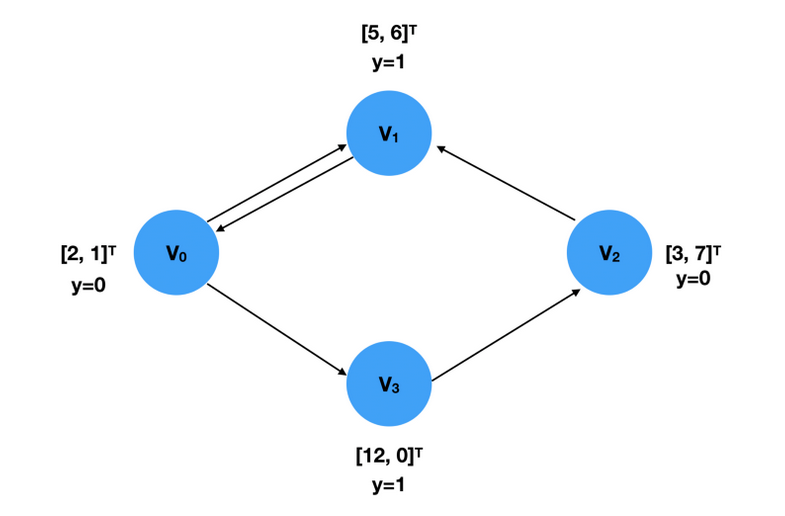

In [ ]:
#above each node has 2 dimentiona feature vector and y indicates their class
x = torch.tensor([[2,1], [5,6], [3,7], [12,0]], dtype=torch.float)
y = torch.tensor([0, 1, 0, 1], dtype=torch.float)

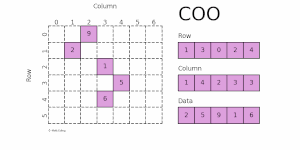

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# specific to pytoch geometric
import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

import time
from datetime import datetime

import networkx as nx
import numpy as np
import torch
import torch.optim as optim

# Datasets
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader

import torch_geometric.transforms as T

from tensorboardX import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

The GNNStack is our general framework for a GNN which can handle different types of convolutional layers, and both node and graph classification. The build_conv_model method determines which type of convolutional layer to use for the given task -- here we choose to use a graph convolutional network for node classification, and a graph isomorphism network for graph classification. Note that PyTorch Geometric provides out-of-the-box modules for these layers, which we use here. The model consists of 3 layers of convolution, followed by mean pooling in the case of graph classification, followed by two fully-connected layers. Since our goal here is classification, we use a negative log-likelihood loss function.

In [ ]:
class GNNStack(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, task='node'):
        super(GNNStack, self).__init__()
        self.task = task
        self.convs = nn.ModuleList() #adding module list to append more operation
        self.convs.append(self.build_conv_model(input_dim, hidden_dim))
        self.lns = nn.ModuleList() #adding module list to append more operation
        self.lns.append(nn.LayerNorm(hidden_dim))
        self.lns.append(nn.LayerNorm(hidden_dim))
        for l in range(2):
            self.convs.append(self.build_conv_model(hidden_dim, hidden_dim))

        # post-message-passing
        self.post_mp = nn.Sequential( #for sequential opeations
            nn.Linear(hidden_dim, hidden_dim), nn.Dropout(0.25), 
            nn.Linear(hidden_dim, output_dim))
        if not (self.task == 'node' or self.task == 'graph'):
            raise RuntimeError('Unknown task.')

        self.dropout = 0.25
        self.num_layers = 3

    def build_conv_model(self, input_dim, hidden_dim):
        # refer to pytorch geometric nn module for different implementation of GNNs.
        if self.task == 'node':
            return pyg_nn.GCNConv(input_dim, hidden_dim)
        else:
            return pyg_nn.GINConv(nn.Sequential(nn.Linear(input_dim, hidden_dim),
                                  nn.ReLU(), nn.Linear(hidden_dim, hidden_dim)))

    def forward(self, data):
        ''' 
       data : Element of dataset or pytorch objects
       data.x : feature matrix (Nodes x features)
       data.edge_index : adjacency matrix 
       data.batch : data of nodes belongs to which graph
        '''
        x, edge_index, batch = data.x, data.edge_index, data.batch
        if data.num_node_features == 0:
          x = torch.ones(data.num_nodes, 1)

        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index)
            emb = x #for visulizaton purpose
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            if not i == self.num_layers - 1:
                x = self.lns[i](x)

        if self.task == 'graph':
            x = pyg_nn.global_mean_pool(x, batch)

        x = self.post_mp(x)

        return emb, F.log_softmax(x, dim=1)

    def loss(self, pred, label):
        return F.nll_loss(pred, label)

Here pyg_nn.GCNConv and pyg_nn.GINConv are instances of MessagePassing. They define a single layer of graph convolution, which can be decomposed into:
* Message computation
* Aggregation
* Update
* Pooling

Here we give an example of how to subclass the pytorch geometric MessagePassing class to derive a new model (rather than using existing GCNConv and GINConv).

We make use of `MessagePassing`'s key building blocks:
- `aggr='add'`: The aggregation method to use ("add", "mean" or "max").
- `propagate()`: The initial call to start propagating messages. Takes in the edge indices and any other data to pass along (e.g. to update node embeddings).
- `message()`: Constructs messages to node i. Takes any argument which was initially passed to propagate().
- `update()`: Updates node embeddings. Takes in the output of aggregation as first argument and any argument which was initially passed to propagate().


In [ ]:
class CustomConv(pyg_nn.MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(CustomConv, self).__init__(aggr='add')  # "Add" aggregation.
        self.lin = nn.Linear(in_channels, out_channels)
        self.lin_self = nn.Linear(in_channels, out_channels)

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Add self-loops to the adjacency matrix.
        edge_index, _ = pyg_utils.remove_self_loops(edge_index)

        # Transform node feature matrix.
        self_x = self.lin_self(x)
        #x = self.lin(x)

        return self_x + self.propagate(edge_index, size=(x.size(0), x.size(0)), x=self.lin(x))

    def message(self, x_i, x_j, edge_index, size):
        # Compute messages
        # x_j has shape [E, out_channels]

        row, col = edge_index
        deg = pyg_utils.degree(row, size[0], dtype=x_j.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        return x_j

    def update(self, aggr_out):
        # aggr_out has shape [N, out_channels]
        return aggr_out

# Training setup

We train the model in a standard way here, running it forwards to compute its predicted label distribution and backpropagating the error. Note the task setup in our graph setting: for node classification, we define a subset of nodes to be training nodes and the rest of the nodes to be test nodes, and mask out the test nodes during training via `batch.train_mask`. For graph classification, we use 80% of the graphs for training and the remainder for testing, as in other classification settings.

In [ ]:
def train(dataset, task, writer):
    if task == 'graph':
        data_size = len(dataset)
        loader = DataLoader(dataset[:int(data_size * 0.8)], batch_size=64, shuffle=True)
        test_loader = DataLoader(dataset[int(data_size * 0.8):], batch_size=64, shuffle=True)
    else:
        test_loader = loader = DataLoader(dataset, batch_size=64, shuffle=True)

    # build model
    model = GNNStack(max(dataset.num_node_features, 1), 32, dataset.num_classes, task=task)
    opt = optim.Adam(model.parameters(), lr=0.01)
    
    # train
    for epoch in range(200):
        total_loss = 0
        model.train()
        for batch in loader:
            #print(batch.train_mask, '----')
            opt.zero_grad()
            embedding, pred = model(batch)
            label = batch.y
            if task == 'node':
                pred = pred[batch.train_mask]
                label = label[batch.train_mask]
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(loader.dataset)
        writer.add_scalar("loss", total_loss, epoch)

        if epoch % 10 == 0:
            test_acc = test(test_loader, model)
            print("Epoch {}. Loss: {:.4f}. Test accuracy: {:.4f}".format(
                epoch, total_loss, test_acc))
            writer.add_scalar("test accuracy", test_acc, epoch)

    return model


Test time, for the CiteSeer/Cora node classification task, there is only 1 graph. So we use masking to determine validation and test set.

For graph classification tasks, a subset of graphs is considered validation / test graph.

In [ ]:
def test(loader, model, is_validation=False):
    model.eval()

    correct = 0
    for data in loader:
        with torch.no_grad():
            emb, pred = model(data)
            pred = pred.argmax(dim=1)
            label = data.y

        if model.task == 'node':
            mask = data.val_mask if is_validation else data.test_mask
            # node classification: only evaluate on nodes in test set
            pred = pred[mask]
            label = data.y[mask]
            
        correct += pred.eq(label).sum().item()
    
    if model.task == 'graph':
        total = len(loader.dataset) 
    else:
        total = 0
        for data in loader.dataset:
            total += torch.sum(data.test_mask).item()
    return correct / total

# Training the model

Let's train our model and visualize its progress. First, run this snippet to generate a link to TensorBoardX, which will take you to a page where you can visualize the loss and accuracy curves of the model.

In [ ]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format("./log")
)
get_ipython().system_raw('./ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://ad276a25.ngrok.io


Now run this snippet to start the training. When it's finished, you should be able to see its training and test performance over time on the TensorBoardX page. If you run the snippet multiple times, you will be able to see multiple training curves and compare them.

We start with a graph classification task on the IMDB-BINARY dataset.

In [ ]:
writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
dataset = dataset.shuffle()
task = 'graph'

model = train(dataset, task, writer)

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


AttributeError: ignored

Here we try a node classification task on the Citeseer citation network:

In [ ]:
writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

dataset = Planetoid(root='/tmp/cora', name='cora')
task = 'node'

model = train(dataset, task, writer)

tensor([ True,  True,  True,  ..., False, False, False]) ----
Epoch 0. Loss: 1.9884. Test accuracy: 0.1010
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
Epoch 10. Loss: 0.5704. Test accuracy: 0.7070
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False, False, False]) ----
tensor([ True,  True,  True,  ..., False,

# Visualizing node embeddings

One great quality about graph neural networks is that, like other deep methods, their hidden layers provide low-dimensional representations of our data. In the case of node classification, we get a low-dimensional representation for each node in our graph. Let's visualize the output of the last convolutional layer in our node classification GNN via TSNE, a method for plotting high-dimensional data. Nodes are colored according to their labels. We see that nodes with similar labels tend to be near each other in the embedding space, a good indication that our model has learned a useful representation.

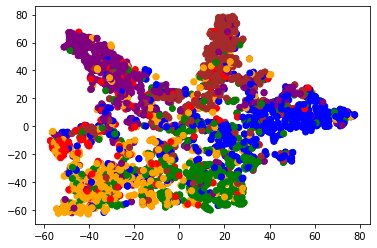

In [ ]:
color_list = ["red", "orange", "green", "blue", "purple", "brown"]

loader = DataLoader(dataset, batch_size=64, shuffle=True)
embs = []
colors = []
for batch in loader:
    emb, pred = model(batch)
    embs.append(emb)
    colors += [color_list[y] for y in batch.y]
embs = torch.cat(embs, dim=0)

xs, ys = zip(*TSNE().fit_transform(embs.detach().numpy()))
plt.scatter(xs, ys, color=colors)

# Learning unsupervised embeddings with graph autoencoders

Finally, GNNs fit nicely in the framework of other neural approaches, and can be used as part of autoencoder techniques, pretraining and multitask learning methods, etc. Here we explore the idea of neural network representations further by building a graph autoencoder which learns these representations in a completely unsupervised way. In contrast to the previous example, we do not make use of the given node labels when training this representation. Instead, we encode the nodes in our network in a low-dimensional space in such a way that the embeddings can be decoded into a reconstruction of the original network. We use graph convolutional layers in the encoder.

You can again use TensorBoardX here to visualize the training progress.

In [ ]:
class Encoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Encoder, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels, 2 * out_channels, cached=True)
        self.conv2 = pyg_nn.GCNConv(2 * out_channels, out_channels, cached=True)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

def train(epoch):
    model.train()
    optimizer.zero_grad()
    z = model.encode(x, train_pos_edge_index)
    loss = model.recon_loss(z, train_pos_edge_index)
    loss.backward()
    optimizer.step()
    
    writer.add_scalar("loss", loss.item(), epoch)

def test(pos_edge_index, neg_edge_index):
    model.eval()
    with torch.no_grad():
        z = model.encode(x, train_pos_edge_index)
    return model.test(z, pos_edge_index, neg_edge_index)

writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

dataset = Planetoid("/tmp/citeseer", "Citeseer", T.NormalizeFeatures())
data = dataset[0]

channels = 16
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('CUDA availability:', torch.cuda.is_available())

# encoder: written by us; decoder: default (inner product)
model = pyg_nn.GAE(Encoder(dataset.num_features, channels)).to(dev)
labels = data.y
data.train_mask = data.val_mask = data.test_mask = data.y = None
data = model.split_edges(data)
x, train_pos_edge_index = data.x.to(dev), data.train_pos_edge_index.to(dev)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1, 201):
    train(epoch)
    auc, ap = test(data.test_pos_edge_index, data.test_neg_edge_index)
    writer.add_scalar("AUC", auc, epoch)
    writer.add_scalar("AP", ap, epoch)
    if epoch % 10 == 0:
        print('Epoch: {:03d}, AUC: {:.4f}, AP: {:.4f}'.format(epoch, auc, ap))

Processing...
Done!
CUDA availability: True
Epoch: 010, AUC: 0.6453, AP: 0.7231
Epoch: 020, AUC: 0.7695, AP: 0.7843
Epoch: 030, AUC: 0.7950, AP: 0.8051
Epoch: 040, AUC: 0.8226, AP: 0.8290
Epoch: 050, AUC: 0.8220, AP: 0.8285
Epoch: 060, AUC: 0.8175, AP: 0.8242
Epoch: 070, AUC: 0.8254, AP: 0.8336
Epoch: 080, AUC: 0.8362, AP: 0.8386
Epoch: 090, AUC: 0.8387, AP: 0.8390
Epoch: 100, AUC: 0.8363, AP: 0.8415
Epoch: 110, AUC: 0.8357, AP: 0.8416
Epoch: 120, AUC: 0.8378, AP: 0.8456
Epoch: 130, AUC: 0.8410, AP: 0.8484
Epoch: 140, AUC: 0.8489, AP: 0.8588
Epoch: 150, AUC: 0.8503, AP: 0.8602
Epoch: 160, AUC: 0.8470, AP: 0.8566
Epoch: 170, AUC: 0.8456, AP: 0.8563
Epoch: 180, AUC: 0.8437, AP: 0.8532
Epoch: 190, AUC: 0.8426, AP: 0.8536
Epoch: 200, AUC: 0.8412, AP: 0.8511


Finally, we plot our embeddings (the output of the encoder) with TSNE. We color each node embedding according to its label -- but note that we did not use any label information when training our encoder. Nodes with the same label are nevetheless close together in the embedding space. The model has learned the community structure without supervision!

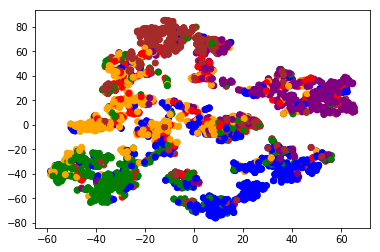

In [ ]:
model.eval()
z = model.encode(x, train_pos_edge_index)
colors = [color_list[y] for y in labels]

xs, ys = zip(*TSNE().fit_transform(z.cpu().detach().numpy()))
plt.scatter(xs, ys, color=colors)
plt.show()